# project 2 multiple linear regression 

# business understanding 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns 


In [2]:
df=pd.read_csv("Downloads/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info

<bound method DataFrame.info of          TV  radio  newspaper  sales
0    230100  37800      69200  22100
1     44500  39300      45100  10400
2     17200  45900      69300   9300
3    151500  41300      58500  18500
4    180800  10800      58400  12900
..      ...    ...        ...    ...
195   38200   3700      13800   7600
196   94200   4900       8100   9700
197  177000   9300       6400  12800
198  283600  42000      66200  25500
199  232100   8600       8700  13400

[200 rows x 4 columns]>

In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# EDA

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [6]:
df["TV"].skew()

-0.06985336213274594

In [7]:
df["radio"].skew()

0.09417463149664534

In [8]:
df["newspaper"].skew()

0.8947204074986169

In [9]:
 df

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


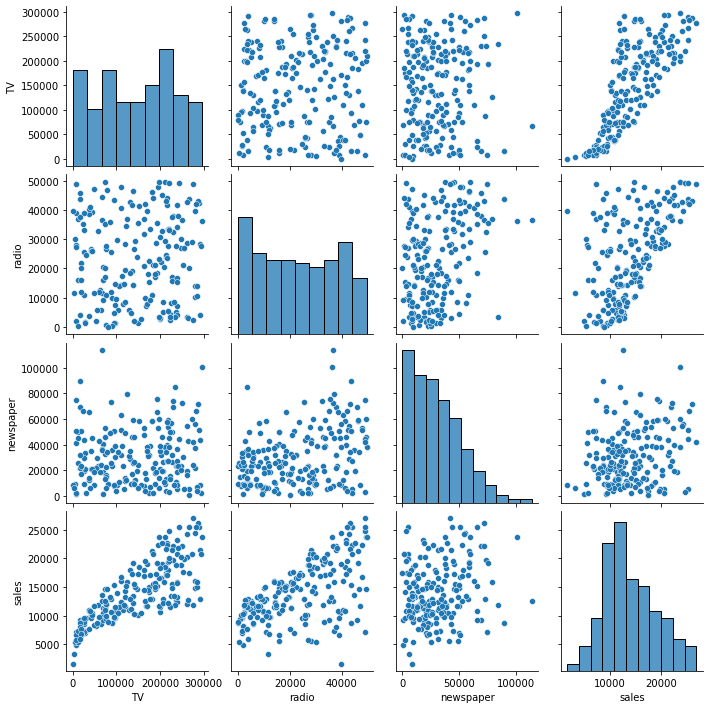

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.cov()

,TV,radio,newspaper,sales
TV,7.370950e+09,6.986249e+07,1.059195e+08,3.503902e+08
radio,6.986249e+07,2.204277e+08,1.144970e+08,4.463569e+07
newspaper,1.059195e+08,1.144970e+08,4.743083e+08,2.594139e+07
sales,3.503902e+08,4.463569e+07,2.594139e+07,2.722185e+07


In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [13]:
x=df.drop(columns="sales")
y=df["sales"]


In [14]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
# modeling 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
model.intercept_

2979.0673381226316

In [17]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [18]:
#prediction

train_prediction=model.predict(x_train)
test_prediction=model.predict(x_test)

In [19]:
# Evaluation mertrics
from sklearn.metrics import mean_squared_error
test_rmse=np.sqrt(mean_squared_error(y_test,test_prediction))
train_rmse=np.sqrt(mean_squared_error(y_train,train_prediction))
print(test_rmse,train_rmse)


1781.599661533451 1644.7277656443373


In [20]:
model.score(x_train,y_train)

0.8957008271017817

In [21]:
model.score(x_test,y_test)

0.8994380241009119

In [22]:
# corss validation
from sklearn.model_selection import cross_val_score
sc=cross_val_score(model,x,y,cv=5)
print(sc)
sc.mean()

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]


0.8871063495438435

In [23]:
#check the assumation 
#1 linaerity 
test_res=y_test-test_prediction

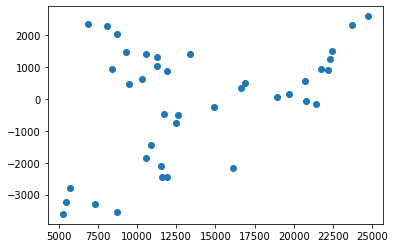

In [24]:
# check the normality error
plt.scatter(y_test,test_res)

<function matplotlib.pyplot.show(close=None, block=None)>

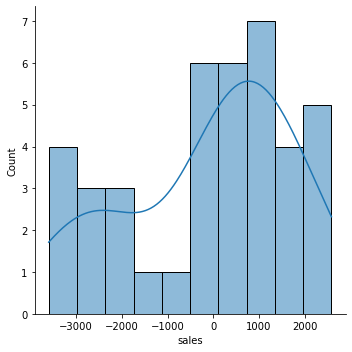

In [25]:
sns.displot(test_res,bins=10,kde=True)
plt.show

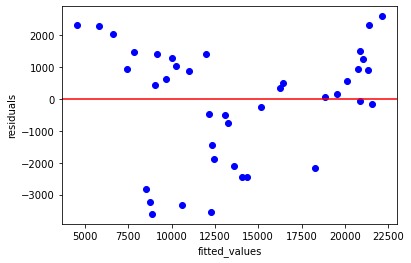

In [26]:
 # equal varinace of error ( homoscdesncity)
plt.scatter(test_prediction,test_res,c="b")
plt.axhline(y=0,color="red")
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [30]:
#varaiables significances
import statsmodels.formula.api as smf
model1=smf.ols("y~x",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        22:25:32   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2938.8894    311.908      9.422      0.000    2323.762    3554.016
x[0]           0.0458      0.001     32.809      0.000       0.043       0.049
x[1]           0.1885      0.009     21.893      0.000       0.172       0.206
x[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

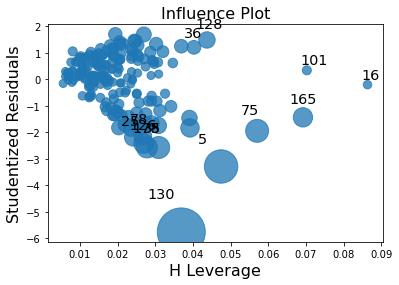

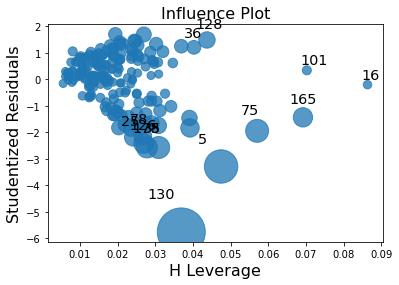

In [31]:
#inlunaces to checking the error of linearity
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [32]:
df.iloc[130]

TV             700
radio        39600
newspaper     8700
sales         1600
Name: 130, dtype: int64

In [33]:
df_new=df.drop(df.index[[130]],axis=0)
df_new

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [34]:
df_new=df.drop(df.index[[130,75,165,5]],axis=0)
df_new

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [37]:
lm=smf.ols(formula="sales~ TV+ radio+ newspaper",data=df_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     713.3
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          8.41e-104
Time:                        22:32:13   Log-Likelihood:                -1708.2
No. Observations:                 196   AIC:                             3424.
Df Residuals:                     192   BIC:                             3438.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3058.7860    277.264     11.032      0.000    2511.912    3605.660
TV             0.0440      0.001     34.713      0.000       0.041       0.046
radio          0.1951      0.008     24.943      0.000       0.180       0.211
newspaper      0.0022      0.005      0.393      0.695      -0.009       0.013
==============================================================================
Omnibus:                       17.166   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.310
Skew:                          -0.762   Prob(JB):                     6.41e-05
Kurtosis:                       3.203   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#variance inflation factor (vif)
res_tv=smf.ols("TV~radio+newspaper",data=df).fit()
res_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TV   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4542
Date:                Tue, 18 Oct 2022   Prob (F-statistic):              0.636
Time:                        22:41:58   Log-Likelihood:                -2554.9
No. Observations:                 200   AIC:                             5116.
Df Residuals:                     197   BIC:                             5126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.366e+05   1.26e+04     10.826      0.000    1.12e+05    1.61e+05
radio          0.2298      0.440      0.523      0.602      -0.637       1.097
newspaper      0.1679      0.300      0.560      0.576      -0.423       0.759
==============================================================================
Omnibus:                       93.855   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.314
Skew:                          -0.089   Prob(JB):                      0.00212
Kurtosis:                       1.798   Cond. No.                     9.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#calculting vif s values of independent variables 
req_tv=smf.ols("TV~radio+newspaper",data=df).fit().rsquared
vif_tv=1/(1-req_tv)

req_radio=smf.ols("radio~TV+newspaper",data=df).fit().rsquared
vif_radio=1/(1-req_radio)

req_newspaper=smf.ols("newspaper~TV+radio",data=df).fit().rsquared
vif_newspaper=1/(1-req_newspaper)


In [50]:
#storing vif values in adtafream 
d1={"varibles":["TV","radio","newspaper"],"VIF":[vif_tv,vif_radio,vif_newspaper],}
vif_fream=pd.DataFrame(d1)
vif_fream

,varibles,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


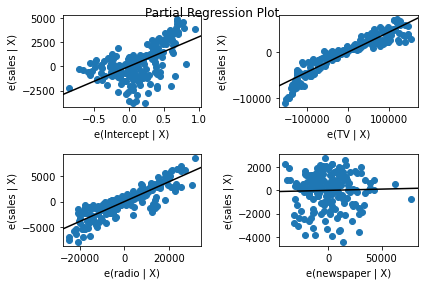

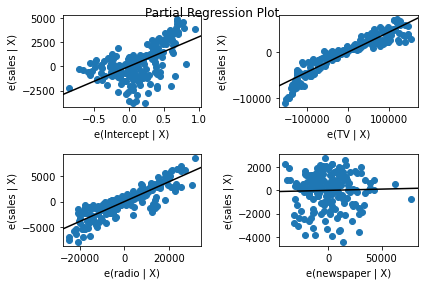

In [52]:
#added the variable plot (av plot)
sm.graphics.plot_partregress_grid(lm)

In [53]:
#final model including tv and radio only 
final_model=smf.ols(formula="sales~ TV+radio",data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           4.83e-98
Time:                        22:53:38   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3541.
Df Residuals:                     197   BIC:                             3551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2921.0999    294.490      9.919      0.000    2340.343    3501.857
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                     4.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#save the model
from joblib import dump
dump(final_model,"sales_model.joblib")

['sales_model.joblib']

In [55]:
#load a model
from joblib import load 
loaded_model=load("sales_model.joblib")